The following notebook computes the quantitative assessment metrics of the single and multi-visit reconstruction produced in Steps 00-03. The metrics are computed on a third independent test set which does not share any scans from subjects within the train and validation sets. The test set consists of 7 longitudinal pairs of scans. The SSIM and pSNR of the single-visit reconstructions are compared to the multi-visit reconstructions to measure the improvements when incorporating previous subject-specific information. The first and last 20 slices are removed before computing metrics to eliminate slices with little to no anatomical structures. 

In [123]:
import glob
import nibabel
import sys
import nibabel as nib
import numpy as np
import tqdm
import matplotlib.pyplot as plt
MY_UTILS_PATH = "../src/"
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import metrics

In [124]:
test_files = np.loadtxt('../data/test_long.txt',dtype=str)[:,1:]
print(test_files)

[['TUM04-20171108.nii' 'TUM04-20180103.nii']
 ['TUM04-20190328.nii' 'TUM04-20190523.nii']
 ['TUM04-20181009.nii' 'TUM04-20190328.nii']
 ['TUM20-20180205.nii' 'TUM20-20180402.nii']
 ['TUM10-20171018.nii' 'TUM10-20180122.nii']
 ['TUM10-20180122.nii' 'TUM10-20180307.nii']
 ['TUM15-20170801.nii' 'TUM15-20170816.nii']]


In [125]:
#file pathes
initial_path = '../data/predicted/10x-varnet/nib/'
previous_path = '../data/reference_reg_10x-varnet/'
enhanced_path = '../data/predicted/10x-enhanced-varnet/'
ref_path = '../../../data/brain-cancer/'

In [126]:
#file ids with pathes
initial_files = [initial_path + file[:-4] + '_predicted.nii' for file in test_files[:,1]]
previous_files = [previous_path + 'elastic_' + file[0][:-4] + '_' + file[1][:-4] + '-1.nii' for file in test_files]
previous_files_multi_visit = [previous_path + 'elastic_' + file[0][:-4] + '_' + file[1][:-4] + '-2.nii' for file in test_files]

enhanced_files = [enhanced_path + file[:-4] + '_predicted-1.nii' for file in test_files[:,1]]
enhanced_files_multi_visit = [enhanced_path + file[:-4] + '_predicted-2.nii' for file in test_files[:,1]]

ref_files = [ref_path + file for file in test_files[:,1]]

In [127]:
init_mets = []
prev_mets = []
prev1_mets = []
enh_mets = []
enh1_mets = []
for ii in tqdm.tqdm(range(len(test_files))):
    init = nib.load(initial_files[ii]).get_fdata()[:,:,20:-20]
    prev = nib.load(previous_files[ii]).get_fdata()[:,:,20:-20]
    prev1 = nib.load(previous_files_multi_visit[ii]).get_fdata()[:,:,20:-20]
    enh = nib.load(enhanced_files[ii]).get_fdata()[:,:,20:-20]
    enh1 = nib.load(enhanced_files_multi_visit[ii]).get_fdata()[:,:,20:-20]
    ref = nib.load(ref_files[ii]).get_fdata()[:,:,20:-20]
    
    init = np.swapaxes(init,0,2)
    prev = np.swapaxes(prev,0,2)
    prev1 = np.swapaxes(prev1,0,2)
    enh = np.swapaxes(enh,0,2)
    enh1 = np.swapaxes(enh1,0,2)
    ref = np.swapaxes(ref,0,2)
    
    init = init / np.abs(init).max()
    prev = prev / np.abs(prev).max()
    prev1 = prev1 / np.abs(prev1).max()
    enh = enh / np.abs(enh).max()
    enh1 = enh1 / np.abs(enh1).max()    
    ref = ref / np.abs(ref).max()
    
    init_mets.append(metrics.metrics(init, ref))
    prev_mets.append(metrics.metrics(prev, ref))
    prev1_mets.append(metrics.metrics(prev1, ref))
    enh_mets.append(metrics.metrics(enh, ref))
    enh1_mets.append(metrics.metrics(enh1, ref))
    

100%|██████████| 7/7 [01:30<00:00, 12.89s/it]


In [128]:
init_mets_cat = np.concatenate(init_mets, axis=1)

prev_mets_cat = np.concatenate(prev_mets, axis=1)
prev1_mets_cat = np.concatenate(prev1_mets, axis=1)

enh_mets_cat = np.concatenate(enh_mets, axis=1)
enh1_mets_cat = np.concatenate(enh1_mets, axis=1)

print(enh_mets_cat.shape)

(2, 837)


In [129]:
init_mets_cat.mean(axis=1)

array([ 0.94044587, 35.11952763])

In [130]:
prev_mets_cat.mean(axis=1)

array([ 0.90715917, 29.99295238])

In [131]:
prev1_mets_cat.mean(axis=1)

array([ 0.90600273, 29.97241823])

In [132]:
enh_mets_cat.mean(axis=1)

array([ 0.95908106, 36.73442099])

In [133]:
enh1_mets_cat.mean(axis=1)

array([ 0.9544934 , 36.22094081])

In [134]:
labels = ['previous', 'multi-visit previous', 'single-visit', 'multi-visit generated from f/sampled prior', 'multi-visit generated from multi-visit prior'] 

In [156]:
mets = np.array([init_mets_cat.mean(axis=1), 
           prev_mets_cat.mean(axis=1), prev_mets_cat.mean(axis=1), 
           enh_mets_cat.mean(axis=1), enh1_mets_cat.mean(axis=1)])

In [157]:
yerr = np.array([init_mets_cat.std(axis=1), 
           prev_mets_cat.std(axis=1), prev_mets_cat.std(axis=1), 
           enh_mets_cat.std(axis=1), enh1_mets_cat.std(axis=1)])

In [164]:
yerr

array([[0.01940865, 1.75198364],
       [0.03783537, 1.90759137],
       [0.03783537, 1.90759137],
       [0.01688033, 1.78243063],
       [0.01709427, 1.71003677]])

In [158]:
colors = sns.color_palette('colorblind',3)

In [163]:
ssim = mets[:,0]
psnr = mets[:,1]

In [198]:
x[1::2]

[1, 2.8]

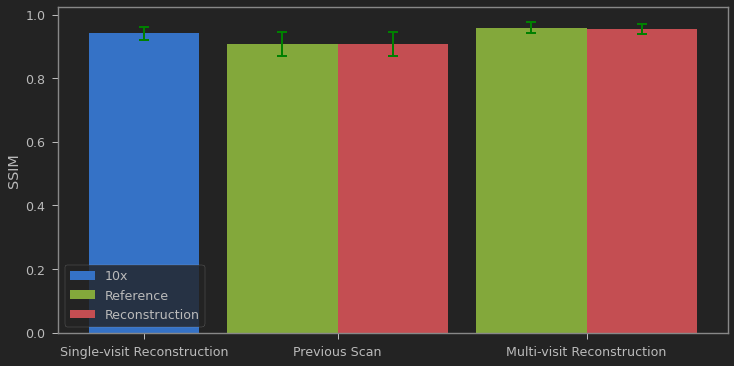

In [210]:
plt.figure(figsize=(12,6))
x = [0, 1, 1.8, 2.8, 3.6]
y = ssim

#plt.bar([0, 1, 1.8, 2.8, 3.6], ssim, yerr=yerr[:,0],  
#        error_kw=dict(ecolor='green', lw=2, capsize=5, capthick=2), 
#        color=[colors[0],colors[1], colors[2], colors[1], colors[2]], 
#        label=([0,1,2], ['VarNet', 'Reference', 'Reconstruction']))

plt.bar(x[0], y[0], yerr=yerr[0,0], error_kw=dict(ecolor='green', lw=2, capsize=5, capthick=2), label='10x')
plt.bar(x[1::2], y[1::2], yerr=yerr[1::2,0],  error_kw=dict(ecolor='green', lw=2, capsize=5, capthick=2), label='Reference')
plt.bar(x[2::2], y[2::2], yerr=yerr[2::2,0],  error_kw=dict(ecolor='green', lw=2, capsize=5, capthick=2), label='Reconstruction')


plt.ylabel('SSIM')
plt.xticks([0,1.4, 3.2], 
           ['Single-visit Reconstruction',
            'Previous Scan',  
            'Multi-visit Reconstruction'], rotation=0)
plt.legend()
plt.show()
plt.close()
